In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# 要遍历的目录路径
path = "Dataset/papers"
file_list = []
filename_list = []
# 使用os.listdir()列出目录下的所有文件和文件夹名
for file in os.listdir(path):
    file_list.append(path + '/' + file)
    filename = file.split(".")[0]
    filename_list.append(filename)
print(file_list)
print(filename_list)


['Dataset/papers/Dentistry.csv', 'Dataset/papers/Economics, Econometrics and Finance.csv', 'Dataset/papers/Biochemistry, Genetics and Molecular Biology.csv', 'Dataset/papers/Engineering.csv', 'Dataset/papers/Materials Science.csv', 'Dataset/papers/Immunology and Microbiology.csv', 'Dataset/papers/Arts and Humanities.csv', 'Dataset/papers/Agricultural and Biological Sciences.csv', 'Dataset/papers/Multidisciplinary.csv', 'Dataset/papers/Nursing.csv', 'Dataset/papers/Pharmacology, Toxicology and Pharmaceutics.csv', 'Dataset/papers/Business, Management and Accounting.csv', 'Dataset/papers/Chemistry.csv', 'Dataset/papers/Computer Science.csv', 'Dataset/papers/Mathematics.csv', 'Dataset/papers/Neuroscience.csv', 'Dataset/papers/Energy.csv', 'Dataset/papers/Chemical Engineering.csv', 'Dataset/papers/Medicine.csv', 'Dataset/papers/Decision Sciences.csv', 'Dataset/papers/Earth and Planetary Sciences.csv', 'Dataset/papers/Health Professions.csv', 'Dataset/papers/Environmental Science.csv']
['Den

In [3]:
#test
# for file in file_list:
file = 'Dataset/papers/Agricultural and Biological Sciences.csv'
df = pd.read_csv(file)
doi_column = df["DOI"]

# 使用列表推导将每个数据转化为集合并添加到列表中
list_of_sets = [set([value]) for value in doi_column]

print(list_of_sets)



[{'10.1038/s42003-023-05299-8'}, {'10.1093/jpe/rtad025'}, {'10.1038/s42003-023-05199-x'}, {'10.1016/j.foodcont.2023.110033'}, {'10.1038/s42003-023-05191-5'}, {'10.1186/s40462-023-00385-2'}, {'10.1186/s13059-023-03024-6'}, {'10.1038/s42003-023-05099-0'}, {'10.1186/s42408-023-00202-6'}, {'10.1038/s42003-023-04940-w'}, {'10.1038/s41526-023-00290-3'}, {'10.1186/s42523-022-00219-3'}, {'10.1038/s42003-023-04953-5'}, {'10.1186/s42408-023-00194-3'}, {'10.1186/s12915-023-01585-3'}, {'10.1186/s13227-023-00213-z'}, {'10.1038/s42003-023-04908-w'}, {'10.1186/s42408-023-00187-2'}, {'10.1038/s42003-023-04801-6'}, {'10.1038/s42003-023-04819-w'}, {'10.1186/s13059-023-02914-z'}, {'10.1038/s42003-023-04729-x'}, {'10.1186/s40462-023-00367-4'}, {'10.1186/s42408-023-00172-9'}, {'10.1016/j.foreco.2023.121322'}, {'10.1016/j.pocean.2023.103110'}, {'10.1016/j.agrformet.2023.109635'}, {'10.1016/j.agrformet.2023.109638'}, {'10.1002/jmor.21639'}, {'10.1007/s11538-023-01198-5'}, {'10.1016/j.mbs.2023.109058'}, {'10.

In [4]:
#生成一个字典，学科名为键，包括的论文ID为值
subject_list = []
data_dict = {}
for file in file_list:
    subject_name = file.split(".")[0]
    subject_name = subject_name.split("/")[-1]
    df = pd.read_csv(file)
    doi_column_cleaned = df["DOI"].dropna()
    list_of_sets = [value for value in doi_column_cleaned]
    data_dict[subject_name] = list_of_sets

with open("data.json", "w") as json_file:
    json.dump(data_dict, json_file, indent=4)


In [5]:
#计算学科之间共同存在的数量。输出是一个字典，
for i in data_dict:
    print(i)
matches = {}  # 结果字典，格式为 {(key1, key2): count}

# 遍历data_dict中的每个键-值对
for key1, value1 in data_dict.items():
    for key2, value2 in data_dict.items():
        # 确保我们没有比较相同的键，并且还没有记录过这对键的匹配
        if key1 != key2 and (key1, key2) not in matches and (key2, key1) not in matches:
            # 获取两个列表的交集
            intersection = set(value1) & set(value2)
            if intersection:  # 如果交集非空
                matches[(key1, key2)] = len(intersection)

print(matches)
# 将元组键转为字符串键
string_keys_dict = {f'{key[0]}-{key[1]}': value for key, value in matches.items()}

# 保存转换后的字典为JSON
with open("match.json", "w") as json_file:
    json.dump(string_keys_dict, json_file, indent=4)


Dentistry
Economics, Econometrics and Finance
Biochemistry, Genetics and Molecular Biology
Engineering
Materials Science
Immunology and Microbiology
Arts and Humanities
Agricultural and Biological Sciences
Multidisciplinary
Nursing
Pharmacology, Toxicology and Pharmaceutics
Business, Management and Accounting
Chemistry
Computer Science
Mathematics
Neuroscience
Energy
Chemical Engineering
Medicine
Decision Sciences
Earth and Planetary Sciences
Health Professions
Environmental Science
{('Dentistry', 'Engineering'): 1, ('Dentistry', 'Materials Science'): 2, ('Dentistry', 'Chemistry'): 1, ('Economics, Econometrics and Finance', 'Biochemistry, Genetics and Molecular Biology'): 1, ('Economics, Econometrics and Finance', 'Engineering'): 10, ('Economics, Econometrics and Finance', 'Arts and Humanities'): 12, ('Economics, Econometrics and Finance', 'Agricultural and Biological Sciences'): 10, ('Economics, Econometrics and Finance', 'Business, Management and Accounting'): 112, ('Economics, Econo

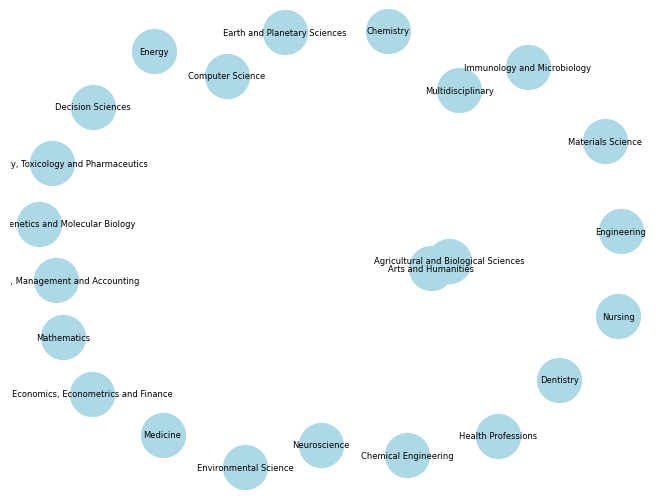

In [6]:
#测试生成图
# Create a new graph
G = nx.Graph()

# Add nodes
nodes = ['Agricultural and Biological Sciences', 'Arts and Humanities', 'Biochemistry, Genetics and Molecular Biology', 'Business, Management and Accounting', 'Chemical Engineering', 'Chemistry', 'Computer Science', 'Decision Sciences', 'Dentistry', 'Earth and Planetary Sciences', 'Economics, Econometrics and Finance', 'Energy', 'Engineering', 'Environmental Science', 'Health Professions', 'Immunology and Microbiology', 'Materials Science', 'Mathematics', 'Medicine', 'Multidisciplinary', 'Neuroscience', 'Nursing', 'Pharmacology, Toxicology and Pharmaceutics']
G.add_nodes_from(nodes)

# Add weighted edges
edges = [('Agricultural and Biological Sciences', 'Arts and Humanities',1)]
G.add_weighted_edges_from(edges)

# Using the weights for spring_layout
pos = nx.spring_layout(G, weight='weight', scale=2)  # 'weight' attribute will be used

edge_weights = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=6, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=15)

plt.show()




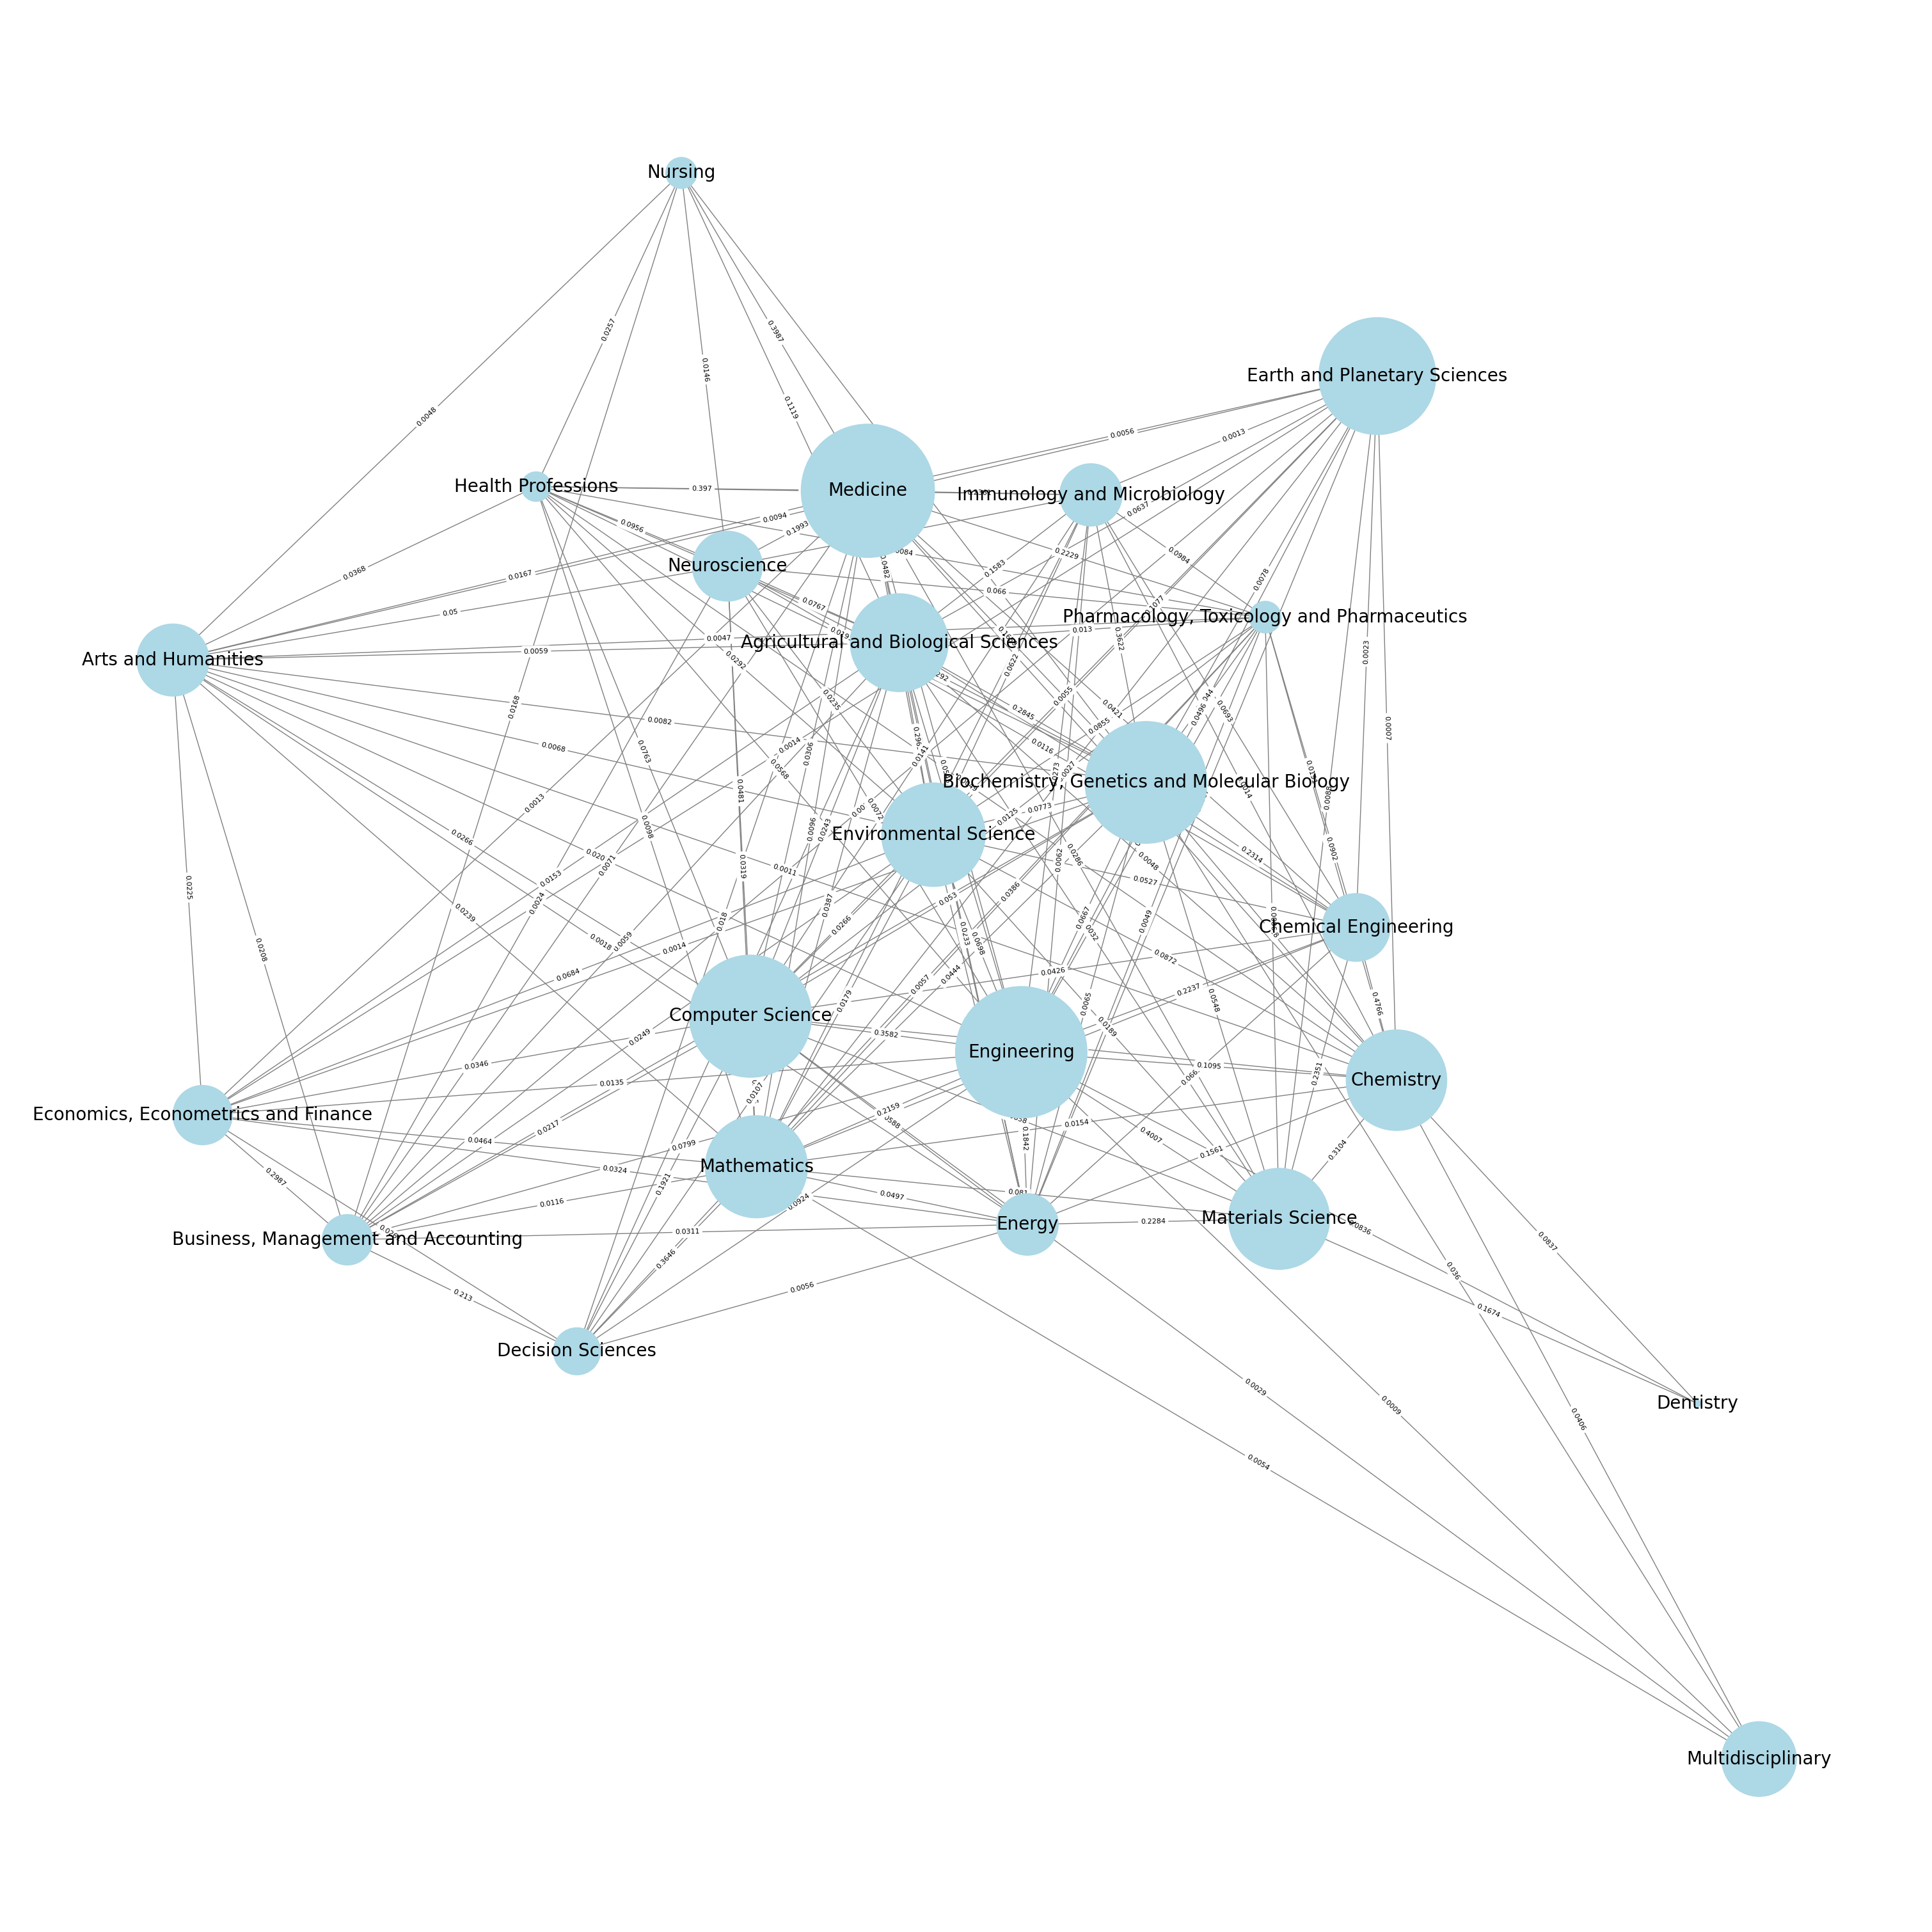

'network_graph.svg'

In [30]:
#最后用的是这个代码画图
import networkx as nx
import matplotlib.pyplot as plt
import json

# 加载 JSON 文件
with open('match.json', 'r') as file:
    data = json.load(file)

with open('new_data.json', 'r') as file:
    number = json.load(file)

direction = {}
for key, value in data.items():
    node1, node2 = key.split('-')  # 拆分键值以获取节点名称
    direction[f'{node1}-{node2}'] = value/number[node1]
    direction[f'{node2}-{node1}'] = value/number[node2]
# print(direction)
with open("direction_match.json", "w") as json_file:
    json.dump(direction, json_file, indent=4)

#平均权重（图里的权重）
average = {}
for key, value in data.items():
    node1, node2 = key.split('-')  # 拆分键值以获取节点名称
    average[f"{node1}-{node2}"]= round((value/number[node1]+value/number[node2])/2,4)
with open("average.json", "w") as json_file:
    json.dump(average, json_file, indent=4)
sorted_average = dict(sorted(average.items(), key=lambda item: item[1], reverse=True))
with open("sorted_average.json", "w") as json_file:
    json.dump(sorted_average, json_file, indent=4)

# 创建一个新图
G = nx.Graph()

# 添加节点
nodes = [
    'Agricultural and Biological Sciences', 'Arts and Humanities', 
    'Biochemistry, Genetics and Molecular Biology', 'Business, Management and Accounting', 
    'Chemical Engineering', 'Chemistry', 'Computer Science', 'Decision Sciences', 
    'Dentistry', 'Earth and Planetary Sciences', 'Economics, Econometrics and Finance', 
    'Energy', 'Engineering', 'Environmental Science', 'Health Professions', 
    'Immunology and Microbiology', 'Materials Science', 'Mathematics', 'Medicine', 
    'Multidisciplinary', 'Neuroscience', 'Nursing', 'Pharmacology, Toxicology and Pharmaceutics'
]
G.add_nodes_from(nodes)

#添加节点大小（论文数目）
sizes = [number[v] * 10 for v in nodes]

# 解析 JSON 数据并添加带权重的边
for key, value in data.items():
    node1, node2 = key.split('-')  # 拆分键值以获取节点名称
    G.add_edge(node1, node2, weight=round((value/number[node1]+value/number[node2])/2,4))  # 添加带有相应权重的边
    # G.add_edge(node1, node2, weight=value)  # 添加带有相应权重的边

# 使用权重进行弹簧布局
pos = nx.spring_layout(G, weight='weight', scale=1.5)  # 将使用 'weight' 属性

# 获取边的权重
edge_weights = nx.get_edge_attributes(G, 'weight')

# 设置更大的图像尺寸以提高分辨率
plt.figure(figsize=(30, 30))

# 绘制图形并调整设置以提高可视性
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=sizes, font_size=20, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=8)

# 保存图形为 SVG 文件以获得更好的可缩放性和清晰度
svg_file_path = 'network_graph.svg'
plt.savefig(svg_file_path, format='svg')

# 显示图形
plt.show()

# 输出 SVG 文件路径
svg_file_path



In [33]:
#为学科/论文的关系生成独热编码csv

import pandas as pd

with open('data.json', 'r') as file:
    data = json.load(file)


# Create a list of unique paper IDs
paper_ids = set()
for papers in data.values():
    paper_ids.update(papers)

# Initialize a dataframe with zeros
df = pd.DataFrame(0, index=sorted(paper_ids), columns=data.keys())

# Mark 1 where the paper belongs to a field
for field, papers in data.items():
    for paper in papers:
        df.at[paper, field] = 1

df.head()  # Display the first few rows of the dataframe
print(df)
# Save the DataFrame to a CSV file
csv_file_path = 'papers_by_field.csv'
df.to_csv(csv_file_path)


                               Dentistry  Economics, Econometrics and Finance  \
10.1001/JAMA.2022.13468                0                                    0   
10.1001/amajethics.2022.167            0                                    0   
10.1001/amajethics.2022.188            0                                    0   
10.1001/amajethics.2022.275            0                                    0   
10.1001/amajethics.2022.535            0                                    0   
...                                  ...                                  ...   
10.7812/TPP/23.018                     0                                    0   
10.7817/JAOS.142.4.2022.AR034          0                                    0   
10.93/g3journal/jkac061                0                                    0   
10.9745/GHSP-D-22-00063                0                                    0   
10.9745/GHSP-D-22-00469                0                                    0   

                           

In [9]:
#计算每个学科包含论文的数目
import json

# 加载 data.json 文件
with open('data.json', 'r') as file:
    data = json.load(file)

# 创建一个新的字典，键不变，值变为原始值的长度
new_data = {key: len(value) for key, value in data.items()}

# 保存新的字典到一个新的 JSON 文件
with open('new_data.json', 'w') as file:
    json.dump(new_data, file, indent=4)  # 使用 indent 参数美化输出格式

# 提示新文件已保存
print("新的 JSON 文件 'new_data.json' 已保存。")


新的 JSON 文件 'new_data.json' 已保存。
